# 👻  **Taller 8 - Machine Learning - KNN**
 <hr>
<img src="https://www.udistrital.edu.co/themes/custom/versh/images/default/preloader.png" align="left" width="192px" height="192px"/>
<img align="left" width="0" height="192px" hspace="10"/>
 
> Juan Felipe Rodríguez Galindo  - **COD. 20181020158**
<br></br>
[![Juan Felipe Rodriguez Galindo](https://img.shields.io/badge/Juferoga-github-br?style=flat-square)](https://gitlab.com/Juferoga)
[![License](https://img.shields.io/badge/License-GPL_V.3-blue?style=flat-square)](https://www.gnu.org/licenses/gpl-3.0.html)
 
 
Introducción a la Ciencia de Datos
 
Desarrrollo del taller propuesto en la clase de introducción a la ciencia de datos, correspondiente a la técnica de machine Learning KNN o vecinos cercanos.

<hr>

## Taller 
 
```
MACHINE LEARNING - KNN
 
1. Seleccionar 5 conjunto de datos de atributos numéricos de UCI, con características diferentes 
(# de atributos, # de muestras, tipo de dato, descripción estadística, etc...) de tal forma 
que permitan obtener conclusiones válidas al evaluar el desempeño de KNN en 
función de las características del conjunto de datos.
 
2. Hacer un análisis estadístico descriptivo de los conjuntos de datos.
 
3. Evaluar KNN (únicamente mediante score()) para cada conjunto de datos, 
para diferentes valores de K.
 
4. Obtener conclusiones sobre la relación del desempeño de KNN con respecto 
a las características del conjunto de datos.
 
5. Generar recomendaciones referentes a la selección del hiperparámetro K 
en función de las características del conjunto de datos. 
```

<hr>

## **Desarrollo**

1. Seleccionamos para el primer puento del taller los conjuntos de datos:

| *ID* 	|                        **Nombre**                       	| **Instancias** 	| **Atributos** 	|                                              **URL**                                              	|
|------	|:-------------------------------------------------------:	|:--------------:	|:-------------:	|:-------------------------------------------------------------------------------------------------:	|
| df1  	| A study of  Asian Religious and Biblical Texts Data Set 	|       590      	|      8265     	| [Dataset](https://archive.ics.uci.edu/ml/datasets/A+study+of++Asian+Religious+and+Biblical+Texts) 	|
| df2  	|       Container Crane Controller Data Set Data Set      	|       15       	|       3       	|       [Dataset](https://archive.ics.uci.edu/ml/datasets/Container+Crane+Controller+Data+Set)      	|
| df3  	|              Cryotherapy Dataset  Data Set              	|       90       	|       7       	|              [Dataset](https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+)              	|
| df4  	|               Haberman's Survival Data Set              	|       306      	|       3       	|              [Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)             	|
| df5  	|       Breast Cancer Wisconsin (Original) Data Set       	|       699      	|       10      	|     [Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)     	|

Debido a su disparidad de forma y datos, tomamos estos conjuntos de datos para realizar su respectivo estudio, tomamos tambien data sets no muy amplios, ya que para el procesamiento se el tiempo de espera, al realizar la comparación, no daba el suficiente tiempo por la capacidad de la maquina. 

In [ ]:
# importamos librerias necesarias para el programa

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
print("Libraries Import Succesfully 🚀")

# importamos el paquete de sklearn necesario para realizar machine learning 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
print("Sklearn KNeighbors Imported 🚧")


Libraries Import Succesfully 🚀
Sklearn KNeighbors Imported 🚧


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importamos google drive para acceder a los conjuntos de datos que estan allí

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importamos el dataframe id: df1
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Taller 8/AllBooks_baseline_DTM_Labelled.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)
#df1.set_index('Unnamed: \0')

In [ ]:
# importamos el dataframe id: df2
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Taller 8/Container_Crane_Controller_Data_Set.csv')
df2.replace('continuous',0, inplace=True)
df2

,Speed,Angle,Power
0,1,-5,0.3
1,2,5,0.3
2,3,-2,0.5
3,1,2,0.5
4,2,0,0.7
5,6,-5,0.5
6,7,5,0.5
7,6,-2,0.3
8,7,2,0.3
9,6,0,0.7


In [ ]:
# importamos el dataframe id: df3
df3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Taller 8/Cryotherapy.csv')
df3

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
...,...,...,...,...,...,...,...
85,2,34,12.00,3,3,95,0
86,2,20,3.50,6,1,75,1
87,2,35,8.25,8,3,100,0
88,1,24,10.75,10,1,20,1


In [ ]:
# importamos el dataframe id: df4
df4 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
df4

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [ ]:
# importamos el dataframe id: df5
df5 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
df5.replace('?',0, inplace=True)
df5

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


<hr>

### Analisis estadistico

En esta sección miraremos factores estadisticos del dataset muy básicos, con el fin de conocer el alcance y las limitaciones entre los datos.

In [ ]:
# DATA FRAME 1
df1.describe()

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,diadem,rushed,saliva,revelation,indirectly,open,distortions,expecteth,perishing,rage,unbridled,looketh,washed,nursingmother,caper,prosperous,lightmindedness,imprisonment,maghavan,supported,distinctions,lambs,illumination,mercury,partakers,tell,build,neither,soft,detraction,...,budding,enjoyer,needs,sittest,eclipsed,engagement,exuberant,abandons,well,cheerfulness,hatest,state,stained,production,whitened,revered,developed,regarded,enactments,aromatical,admireth,foothold,shots,turner,inversion,lifeless,postponement,stout,taketh,kettle,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.003390,0.566102,0.006780,0.001695,0.032203,0.059322,0.001695,0.001695,0.006780,0.001695,0.001695,0.003390,0.003390,0.003390,0.001695,0.057627,0.001695,0.001695,0.001695,0.011864,0.001695,0.008475,0.001695,0.001695,0.001695,0.003390,0.001695,0.003390,0.001695,0.005085,0.001695,0.006780,0.020339,0.001695,0.003390,0.054237,0.018644,0.150847,0.016949,0.003390,...,0.001695,0.006780,0.016949,0.003390,0.001695,0.003390,0.001695,0.001695,0.115254,0.005085,0.001695,0.086441,0.005085,0.008475,0.001695,0.001695,0.022034,0.022034,0.001695,0.001695,0.001695,0.003390,0.001695,0.001695,0.003390,0.001695,0.001695,0.001695,0.022034,0.005085,0.003390,0.006780,0.003390,0.001695,0.001695,0.001695,0.079661,0.008475,0.005085,0.003390
std,0.058173,1.777487,0.082129,0.041169,0.488211,0.326851,0.041169,0.041169,0.082129,0.041169,0.041169,0.058173,0.058173,0.058173,0.041169,0.273445,0.041169,0.041169,0.041169,0.108368,0.041169,0.091744,0.041169,0.041169,0.041169,0.058173,0.041169,0.058173,0.041169,0.071186,0.041169,0.100701,0.152823,0.041169,0.058173,0.345390,0.135379,0.585006,0.153236,0.058173,...,0.041169,0.100701,0.129190,0.058173,0.041169,0.082339,0.041169,0.041169,0.386888,0.071186,0.041169,0.463601,0.071186,0.169678,0.041169,0.041169,0.220793,0.178246,0.041169,0.041169,0.041169,0.058173,0.041169,0.041169,0.058173,0.041169,0.041169,0.041169,0.146918,0.091995,0.058173,0.100701,0.058173,0.041169,0.041169,0.041169,0.366824,0.091744,0.071186,0.058173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

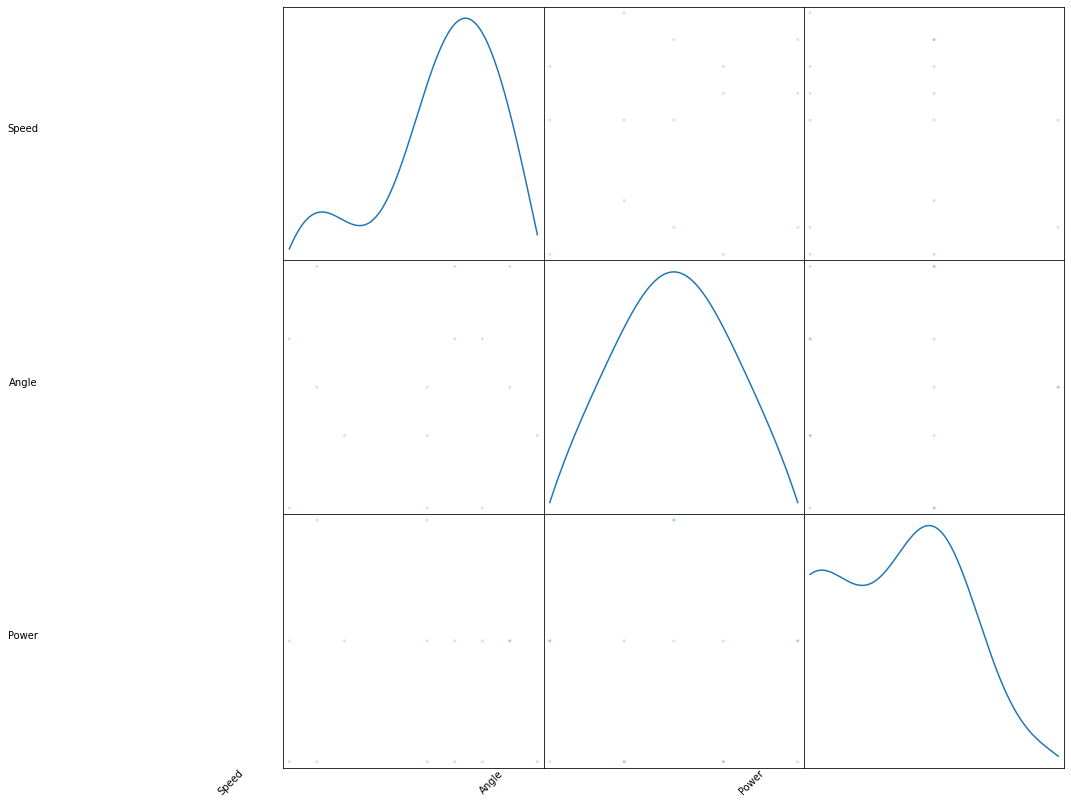

In [ ]:
sm = scatter_matrix(df2, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

In [ ]:
# DATA FRAME 2
df2.describe()

,Speed,Angle,Power
count,15.000000,15.000000,15.000000
mean,5.666667,0.000000,0.446667
std,3.086067,3.525418,0.140746
min,1.000000,-5.000000,0.300000
25%,2.500000,-2.000000,0.300000
50%,6.000000,0.000000,0.500000
75%,8.000000,2.000000,0.500000
max,10.000000,5.000000,0.700000


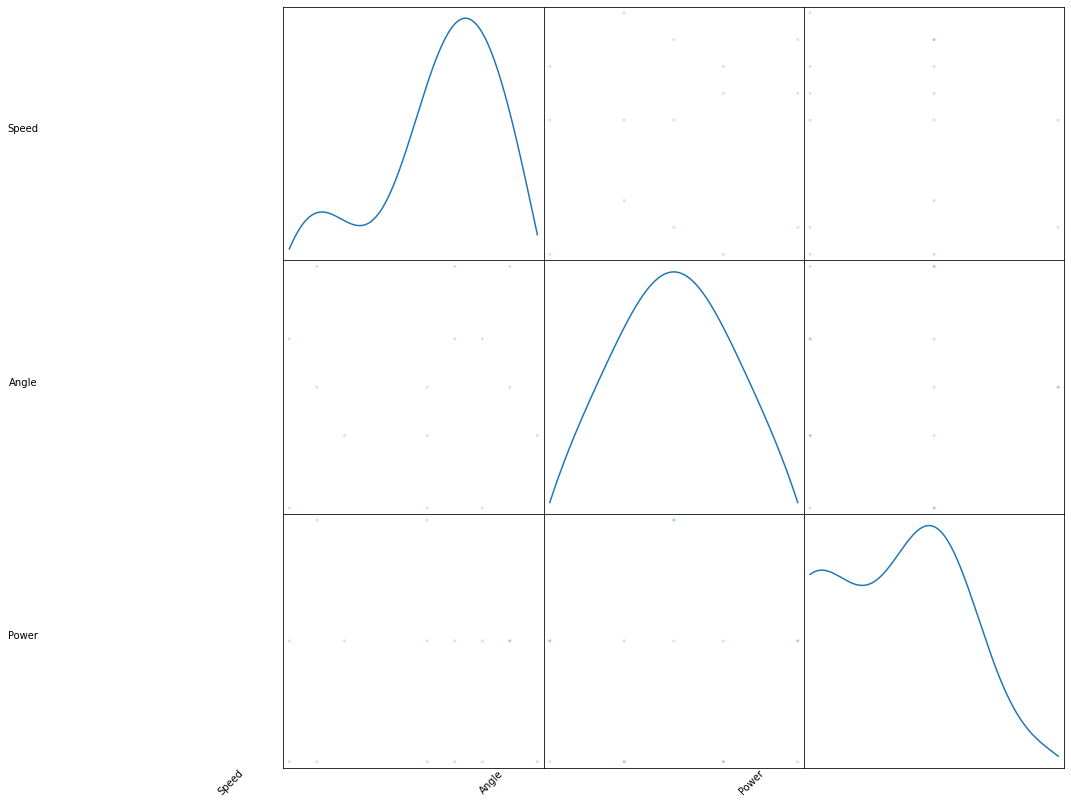

In [ ]:
sm = scatter_matrix(df2, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

In [ ]:
# DATA FRAME 3
df3.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


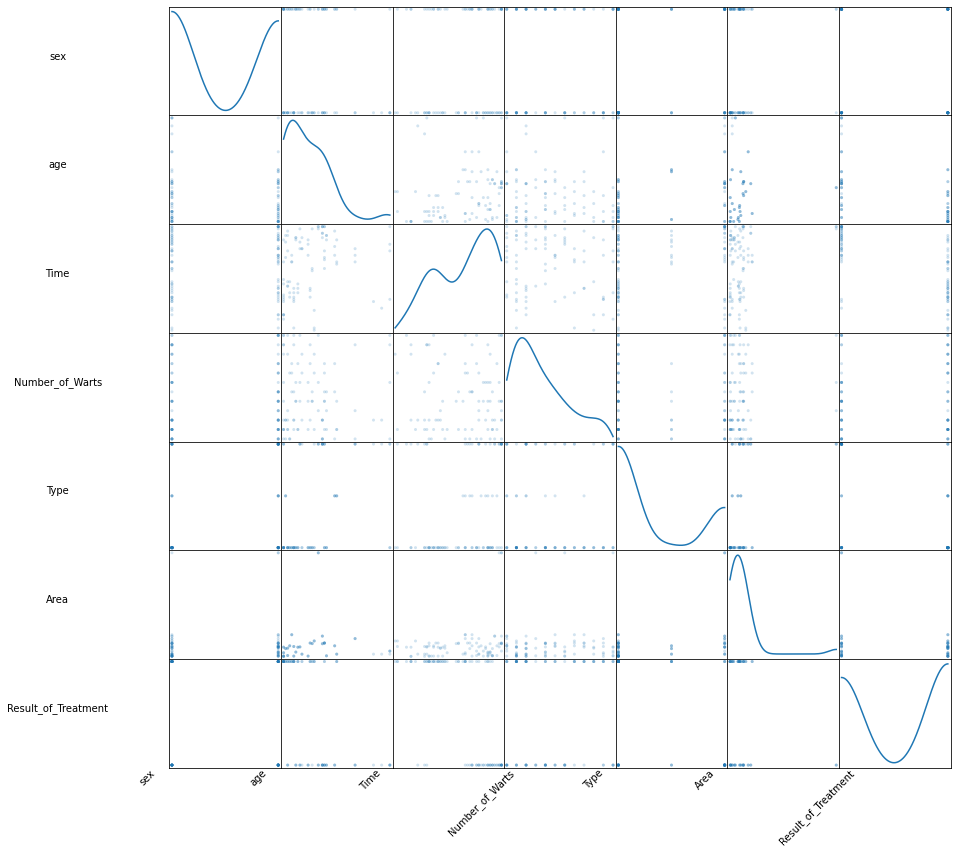

In [ ]:
sm = scatter_matrix(df3, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

In [ ]:
# DATA FRAME 4
df4.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


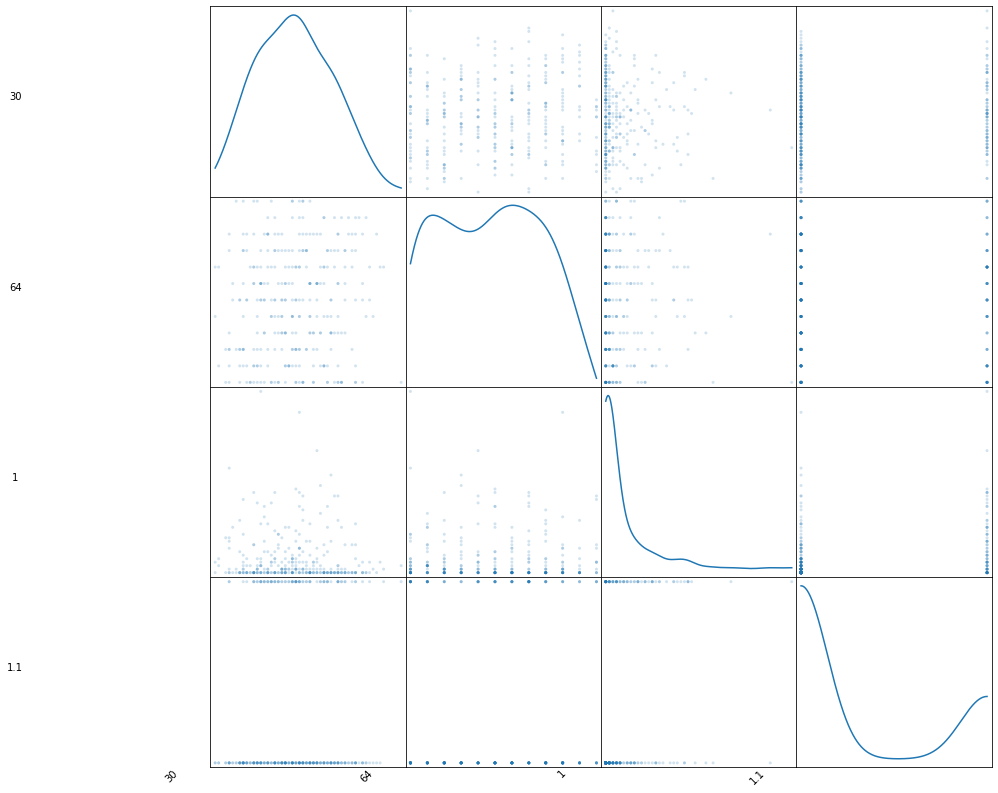

In [ ]:
sm = scatter_matrix(df4, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

In [ ]:
# DATA FRAME 5
df5.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


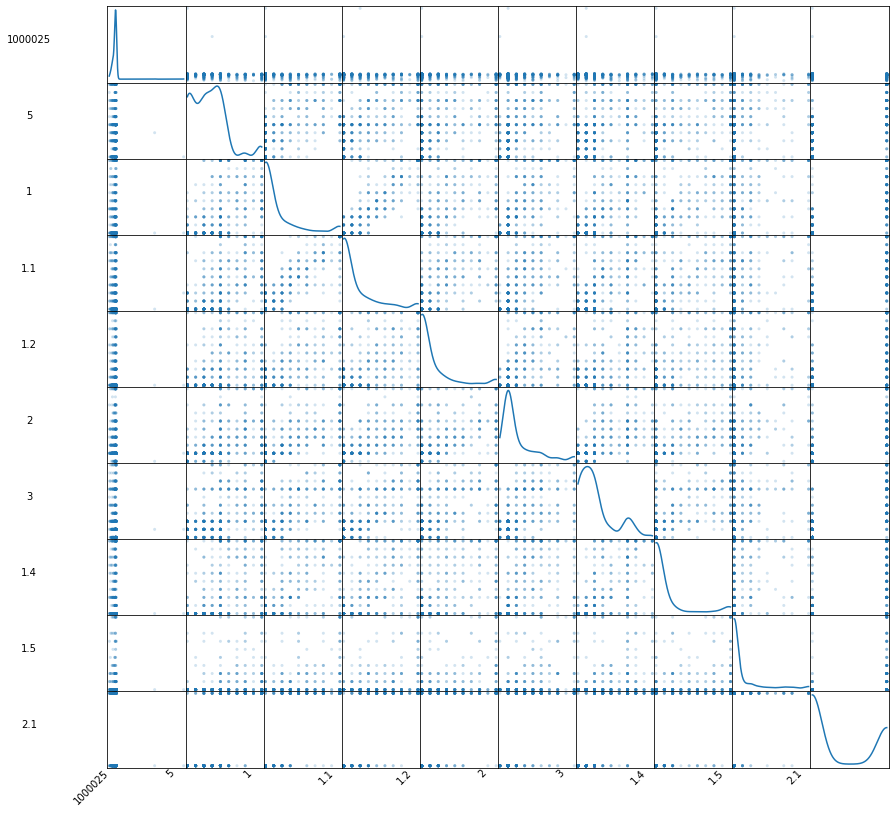

In [ ]:
sm = scatter_matrix(df5, alpha=0.2, figsize=(14, 14), diagonal='kde')

#https://stackoverflow.com/questions/32560932/how-to-customize-a-scatter-matrix-to-see-all-titles
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(-0.2,0) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

<hr>

### Entrenamiento y comparación

En este paso realizamos el proceso de entrenamiento de maquina y el testeo de la misma para adquirir, una base para poder realizar la comparativa de los resultados. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df1.iloc[:,:8264], df1.iloc[:,8264:8265])
y_train
y_test


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 

print()
print(knn.score(x_test, y_test))
print()

print(knn.predict(x_test))
print(y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys



0.9932432432432432

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     attire
448       0
145       0
558       0
263       0
488       0
..      ...
427       0
584       0
323       0
100       0
271       0

[148 rows x 1 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df2.iloc[:,:1], df2.iloc[:,1:2])
y_train
y_test


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 

print()
print(knn.score(x_test, y_test))
print()

print(knn.predict(x_test))
print(y_test)


0.0

[-5 -5  2 -5]
    Angle
3       2
9       0
12     -2
2      -2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df3.iloc[:,:6], df3.iloc[:,6:7])
y_train
y_test

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 

print()
print(knn.score(x_test, y_test))
print()
print(knn.predict(x_test))
print(y_test)


0.6956521739130435

[1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1]
    Result_of_Treatment
72                    1
76                    0
17                    0
19                    1
37                    0
70                    0
32                    0
64                    0
35                    1
7                     0
81                    1
11                    1
54                    1
31                    1
44                    0
85                    0
87                    0
75                    1
51                    1
58                    1
60                    1
84                    1
79                    1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df4.iloc[:,:3], df4.iloc[:,3:4])
y_train
y_test

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 

print()
print(knn.score(x_test, y_test))
print()
print(knn.predict(x_test))
print(y_test)


0.7142857142857143

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1
 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1
 1 1 1]
     1.1
11     1
140    1
276    1
162    1
116    1
..   ...
24     1
35     1
288    1
211    1
265    1

[77 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df5.iloc[:,:10], df5.iloc[:,10:11])
y_train
y_test


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print() 
print(knn.score(x_test, y_test) )
print()

print(knn.predict(x_test))
print(y_test)


0.6

[2 4 4 4 4 4 2 2 4 2 2 2 4 2 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2 4 2 2
 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 4 4 2 2 2 2 4
 2 4 4 2 4 2 2 2 2 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4
 4 4 2 4 2 2 2 2 4 2 4 4 2 2 2 2 2 4 2 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4]
     2.1
503    2
53     4
40     4
362    2
405    2
..   ...
159    4
500    2
131    4
114    2
149    2

[175 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


<hr>

### Conclusión

Podemos concluir de la practica lo siguiente para organizar la información la arreglamos de forma tabulada.

| DataFrame | % Veracidad |
|-----------|-------------|
|    df1    |      99     |
|    df2    |      0      |
|    df3    |      69     |
|    df4    |      71     |
|    df5    |      60     |

Podemos referenciar que el proceso de muestreo que se realizo para obtener el dataset, tiene mucha influencia en el proceso; se tiene también que tener en cuenta el tamaño de los 2 factores escenciales en este caso los atributos y las instancias de los datasets adquieren una gran significancia en el proceso. Pueden influir como vemos en el data frame 2 no existen suficientes datos para poder observar con claridad una prediccion correcta, lo que por el contrario si se obtuvo en el primer dataFrame y con ese comportamiento decrementa su exactitud.


<hr>

### Recomendaciones

Encontrar un buen dataSet es primordial para llegar a un buen entrenamiento de maquina, para esto debemos tener muy en cuenta que el dataset tenga la cantidad adecuada para poder separarlo para poder testearlo y evaluarlo. 

También debemos tener en cuenta que los atributos tambien tengan una cantidad aceptable para poder, entrenar a la maquina y tener resultados mejores, un ejemplo de esto lo podemos ver en el df1.

<hr>

                                                    Fin Taller 8 - KNN MACHINE LEARNING🤖
 
> Juan Felipe Rodríguez Galindo  - **COD. 20181020158**